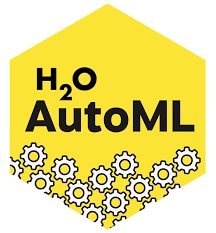


> [H2O.ai AutoML : Automatic Machine Learning](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)

> [H2O AutoML](https://www.h2o.ai/products/h2o-automl/)





In [ ]:
!apt-get install default-jre
!java -version
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

In [ ]:
# Load Dataset.
data = h2o.import_file(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
)
data.head()

In [ ]:
# Split the dataset into Training and Validation Set.
train, test, valid = data.split_frame(ratios=[0.7, 0.15])

# Split the dataset into Feature and Target Set.
X = data.columns
y = "tip"
X.remove("tip")

# Define the AutoML Model.
aml = H2OAutoML(
    max_models=10,
    seed=10,
    exclude_algos=["StackedEnsemble", "DeepLearning"],
    verbosity="info",
    nfolds=0,
)

# Train the Model.
aml.train(x=X, y=y, training_frame=train, validation_frame=valid)

In [ ]:
aml.leaderboard.head()

In [ ]:
# Prediction Set.
y_pred = aml.leader.predict(test)
y_pred.head()

In [ ]:
# Performance Score.
aml.leader.model_performance(test)

In [ ]:
model_ids = list(aml.leaderboard["model_id"].as_data_frame().iloc[:, 0])
model_ids

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
out

In [ ]:
out.params

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path="./")